In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
cwd = os.getcwd()
path_train = os.path.join(cwd, 'dataset/train.csv')

In [13]:
df_train = pd.read_csv(path_train)

In [14]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Tratando valores faltantes

O primeiro passo para um bom resultado em um projeto de Aprendizado de Máquina é tratar valores faltantes. Então, a primeira coisa que fazemos aqui é remover os atributos que apresentam quantidade elevada de missing values, que são: 'MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu'. Aplicar imputação nesse atributos geraria um viés muito grande no conjunto de dados devido a números exorbitantes de valores que não são apresentados, como por exemplo 1453 missing values no atributo 'PoolQC', logo a melhor solução é não utilizar tais atributos.

Após essa remoção, resta features com pequenas quantidades de valores faltantes, com o maior número sendo 81. Para essas features nós utilizamos técnicas de imputação. Em dados categóricos é utilizada a moda do atributo como valor para substituição, enquanto em dados de valor contínuo a média foi utilizada.

In [15]:
df_train.isna().sum().values

array([   0,    0,    0,  259,    0,    0, 1369,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    8,    8,    0,    0,    0,   37,   37,   38,
         37,    0,   38,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,  690,   81,   81,   81,    0,    0,   81,   81,    0,
          0,    0,    0,    0,    0,    0, 1453, 1179, 1406,    0,    0,
          0,    0,    0,    0])

In [16]:
# Removendo os atributos com muitos dados faltantes
df_train = df_train.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu'], axis=1)

# Aplicando imputação
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

In [17]:
df_train.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Tratando Features nominais

Para atributos nominais foi aplicada a numerização, que consiste em substituir as classes de um atributo por números. Esse passo é necessário para que o treino pelos modelos de aprendizado de máquina seja possível.

In [18]:
def nom_to_num(column):
    """
    Recebe um atributo como parâmetro, transforma cada categoria em números e retorna uma Series do vetor transformado
    """

    # Extrai as diferentes classes do atributo 
    keys = column.value_counts().keys()
    i = 0

    # Para cada classe atribui um número
    for key in keys:
         column = column.replace(to_replace = key, value = i)
         i += 1

    return column

In [19]:
def handle_nom(df, columns):
    """
    Recebe um DataFrame e os atributos a serem transformados de nominais para numéricos e retorna um DataFrame com esses atributos      transformados
    """

    # Para cada coluna, aplica a função de transformação
    for feature in columns:
        df[feature] = nom_to_num(df[feature])

    return df


In [20]:
# Colunas com atributos nominais para serem transformados em númericos

columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood', 'Condition1','Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [21]:
df_train_final = handle_nom(df_train, columns).drop('Id', axis=1)

In [22]:
df_train_final

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,3,0,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,1,0,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,1,0,0,1,0,...,272,0,0,0,0,2,2006,0,2,140000
4,60,0,84.0,14260,0,1,0,0,3,0,...,0,0,0,0,0,12,2008,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,62.0,7917,0,0,0,0,0,0,...,0,0,0,0,0,8,2007,0,0,175000
1456,20,0,85.0,13175,0,0,0,0,0,0,...,0,0,0,0,0,2,2010,0,0,210000
1457,70,0,66.0,9042,0,0,0,0,0,0,...,0,0,0,0,2500,5,2010,0,0,266500
1458,20,0,68.0,9717,0,0,0,0,0,0,...,112,0,0,0,0,4,2010,0,0,142125


## Divisão dos dados

Para podermos analisar e melhorar os parâmetros utilizados no regressor, os dados serão separados em conjunto de treino e validação, sendo o conjunto de validação utilizado para fazermos um _tunning_ no modelo. Essa separação é necessária para verificarmos o tradeoff viés-variância antes de aplicarmos o modelo no conjunto de testes

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df_train_final.drop('SalePrice', axis=1)
y = df_train_final['SalePrice']

In [25]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=9)

## Regressores


### Análise de modelos

    - Os modelos aqui analisados serão: RandomForestRegressor, SVM e uma rede neural

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

### Redução de dimensionalidade e Normalização

Nesta seção é aplicado o algoritmo de redução de dimensionalidade PCA. Ao utilizarmos algoritmos mais simples, como Random Forest e SVM devemos ter cuidado com a quantidade de features, e.g. dimensão, dos nossos dados, pois algumas características podem inserir ruído e acabar por "confundir" o modelo.

O PCA é um algoritmo não-supervisionado que analisa a variância entre cada feature e gera uma transformação linear de forma a maximizar essa variância. Com a variância maximizada, características que não acrescentam ao modelo, ou que prejudicam, são retiradas.

Para selecionar a quantidade de componentes do PCA que utilizaremos, passamos o valor .95, que indica que queremos o número de features que representam 95% da variância da base de dados. Dessa forma, são retornadas 54 features, que são utilizadas para o Rnadom Forest e para o SVM. Como as features geradas pelo PCA são uma combinação de outras características, elas não apresentam um real significa como a features originais.

Para a Rede Neural, devido ao método ser mais robusto e complexo, utilizaremos o conjunto de dados original, com 74 features.

Também é aplicada normalização dos dados do conjunto. a normalização é feita de tal forma que a distribuição de todas as características estejam entre 0 e 1. Como o conjunto apresenta uma variação bem grande na distribuição dos dados, a normalização acaba por facilitar a identificação de determinados padrões pelo modelo. A normalização é feita através da subtração da média e divisão pelo desvio padrão em cada feature separadamente



In [23]:
# Normalização dos dados utilizando StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_std = std.transform(X_train)

In [24]:
# Utilização do PCA nos dados normalizados

pca = PCA()
pca.fit(X_train_std)
sum_var = np.cumsum(pca.explained_variance_ratio_)*100

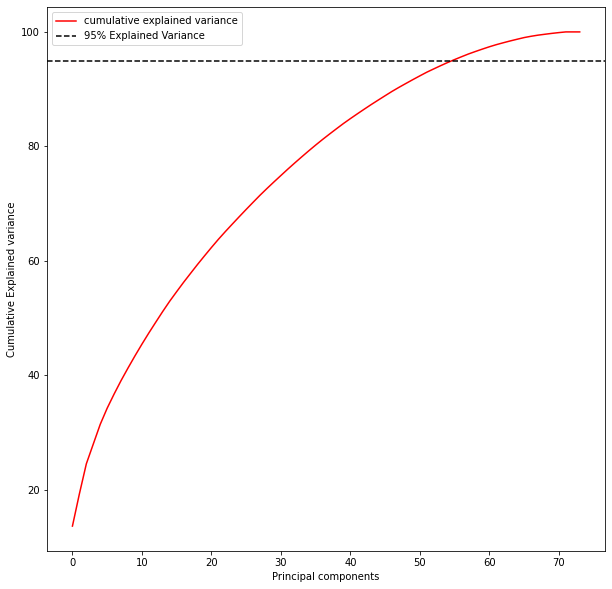

In [25]:
# Plottando a variância explicada em relação à quantidade de componentes dos PCA

d = [n for n in range(len(sum_var))]
plt.figure(figsize=(10, 10))
plt.plot(d,sum_var, color = 'red',label='cumulative explained variance')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

### Random Forest Regressor

O Random Forest Regressor é um algoritmo de ensemble que utiliza o método de Bagging. Funciona da seguinte forma: o conjunto de dados é separado em vários subconjuntos menores, e cada conjunto desse é independente, ou seja, não possuem dados sobressalentes. Então são contruídas várias árvores profundas e treinadas com diferentes subconjuntos de forma que cada árvore extraia diferentes conceitos de cada subconjunto. Então as árvores são agregadas e a média do resultado de todas as árvores é a saída final do Random Forest

Em geral, um conjunto de regressores fracos apresentam melhor resultado que um único regressor forte.

Foi utilizado o GridSearch Cross-Validation com 10 partições para identificar o conjunto de hiperparâmetros que tem a melhor performance, utilizando RMSE como métrica.


In [26]:
# Aplicando Standardization e PCA aos dados
pca = PCA(.95)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)

# Construindo um GridSearch para identificar os melhores hiperparâmetros para o regressador
grid_search = GridSearchCV(estimator=RandomForestRegressor(),param_grid={ 'max_depth': range(3,7),'n_estimators': (10, 50, 100, 500),},cv=10, scoring='neg_root_mean_squared_error', verbose=0, n_jobs=-1)

In [27]:
# Executando a busca pelos melhores hiperparâmetros
grid_result = grid_search.fit(X_train_pca, y_train)

In [28]:
# Resultado da busca
grid_result.best_params_

{'max_depth': 6, 'n_estimators': 50}

In [29]:
# Criando o modelo utilizando os hiperparâmetros encontrados
rf_model = RandomForestRegressor(max_depth=grid_result.best_params_['max_depth'], n_estimators=grid_result.best_params_['n_estimators'], random_state=9)

In [30]:
# Treinando o modelo
rf_model.fit(X_train_pca, y_train)

RandomForestRegressor(max_depth=6, n_estimators=50, random_state=9)

In [31]:
# Resultado do modelo
y_pred = rf_model.predict(pca.transform(X_val))
rf_result = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE = ', round(rf_result, 4))

RMSE =  221660.6842


### SVM

O SVM, usualmente muito utilizado para classificação, também pode ser utilizado para regressão. Os princípios do algorítmo continuam o mesmo: definir um hiperplano e maximizar a margem entre os dados. O algorítmo apresenta certa aceitação de erros, o que pode prejudicar sua performance em problemas de regressão, já que a saída é em intervalo contínuo e apresenta infinitas possibilidades. O SVM é um modelo muito robusto e na "era" pré Deep Learning era tão usado quanto as redes neurais atualmente, devido a sua capacidade de aprender diversas funções complexas.

Fazemos aqui novamente o uso do GridSearch para encontrarmos os melhores parâmetros possíveis dentro de um espaço de busca pré-definido.



In [32]:
from sklearn import svm

In [33]:
# Definindo o espaço de busca para o GridSearch

grid_search = GridSearchCV(svm.SVR(), param_grid={'kernel': ('poly', 'rbf', 'sigmoid'), 'degree': (2,3,4,5), 'gamma': np.linspace(0,1, num=5), 'C': (1,5,10,20,80,100, 200)})

In [34]:
# Fazendo a busca pelos melhores hiperparâmetros

grid_result = grid_search.fit(X_train_pca, y_train)

In [35]:
# Resultado da busca

grid_result.best_params_

{'C': 200, 'degree': 2, 'gamma': 0.25, 'kernel': 'sigmoid'}

In [36]:
# Criando o modelo utilizando ps hiperparâmetros encontrados

svm_model = svm.SVR(kernel=grid_result.best_params_['kernel'], gamma=grid_result.best_params_['gamma'], degree=grid_result.best_params_['degree'], C=grid_result.best_params_['C'])

In [37]:
# Treinando o modelo

svm_model.fit(X_train_pca, y_train)

SVR(C=200, degree=2, gamma=0.25, kernel='sigmoid')

In [47]:
# Avaliação do modelo utilizando RMSE

y_pred = svm_model.predict(pca.transform(X_val))
svm_result = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE = ', round(svm_result, 4))

RMSE =  94067.5619


### Rede Neural

Um dos maiores passos da computação nesse década, o Deep Learning apresenta robustez maior que os algorítmos de Aprendizagem clássicos apresentados anteriormente. Uma Rede Neural consiste basicamente da tentativa de encontrar o mínimo global do gradiente de uma função de perda. Ela é composta por um número $N$ de camadas e cada camada $N_i$ possui uma quantidade $X_i$ de neurônios e seus respectivos pesos. A rede neural recebe um vetor de features e o resultado baseado na função de ativação que cada camada recebeu. Após isso, é computado o erro utilizando uma função de perda e os pessoas da rede neural são atualizados.

Devido a complexidade e robustez do método, foi utilizado o banco de dados original, sem aplicação do PCA ou Normalização das características.

**O modelo criado para esse problema utiliza:**

    -   4 camadas:
        -   primeira camada: 30 neurônios; função de ativação: ReLU; Tamanho de entrada: 74 features;
        -   segunda camada: 15 neurônios; função de ativação: ReLU;
        -   terceira camada: 20 neurônios; função de ativação: ReLU;
        -   camada de saída: 1 neurônios; função de ativação: Linear.
    -   função de perda: Mean Squared Error;
    -   otimizador: adam;
    -   métricas utilizadas: Mean Absolute Error, Mean Squared Logarithmic Error;
    -   Épocas: 1000;
    -   Batch Size: 10;
    -   Conjunto de Validação: 20% do conjunto original.

In [39]:
# Importando os métodos necessários do Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
# Função para criar o modelo

def create_model():
    NN = Sequential()
    NN.add(Dense(30, input_dim = 74, activation='relu'))
    NN.add(Dense(15, activation='relu'))
    NN.add(Dense(20, activation='relu'))
    NN.add(Dense(1))

    return NN

In [41]:
# Criando o modelo

nn_model = create_model()
nn_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_logarithmic_error'])

In [42]:
# Treinando a rede neural

history = nn_model.fit(X, y, epochs=1000, batch_size=10, validation_split=0.2)

loss: 1034347264.0000 - mean_absolute_error: 20657.1387 - mean_squared_logarithmic_error: 0.0275 - val_loss: 3876446208.0000 - val_mean_absolute_error: 26261.3203 - val_mean_squared_logarithmic_error: 0.0408
Epoch 285/1000
117/117 [==============================] - 0s 3ms/step - loss: 1057496192.0000 - mean_absolute_error: 21436.2266 - mean_squared_logarithmic_error: 0.0293 - val_loss: 4088204800.0000 - val_mean_absolute_error: 25838.0410 - val_mean_squared_logarithmic_error: 0.0413
Epoch 286/1000
117/117 [==============================] - 0s 3ms/step - loss: 1027844288.0000 - mean_absolute_error: 20370.8984 - mean_squared_logarithmic_error: 0.0267 - val_loss: 4013447936.0000 - val_mean_absolute_error: 25959.2715 - val_mean_squared_logarithmic_error: 0.0414
Epoch 287/1000
117/117 [==============================] - 0s 3ms/step - loss: 1032662656.0000 - mean_absolute_error: 20383.7383 - mean_squared_logarithmic_error: 0.0270 - val_loss: 3625418496.0000 - val_mean_absolute_error: 26154.06

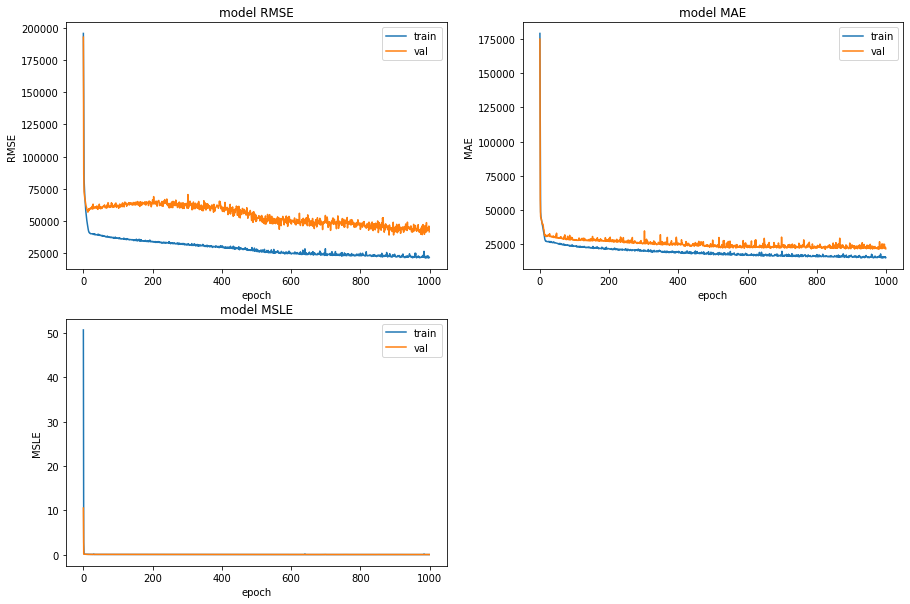

In [45]:
# Métricas para avaliação do modelo

plt.figure(figsize=(15, 10))
plt.subplot(221)
plt.plot(np.sqrt(history.history['loss']))
plt.plot(np.sqrt(history.history['val_loss']))
plt.title('model RMSE')
plt.ylabel('RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

plt.subplot(222)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

plt.subplot(223)
plt.plot(history.history['mean_squared_logarithmic_error'])
plt.plot(history.history['val_mean_squared_logarithmic_error'])
plt.title('model MSLE')
plt.ylabel('MSLE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')

In [48]:
nn_result = np.sqrt(history.history['loss'][-1])
print('RMSE Final: ', round(nn_result, 4))

RMSE Final:  21686.4035


## Comparação entre os resultados de cada modelo

Como tese para esse Desafio, busco apresentar uma comparação da capacidade de dois modelos clássicos de Aprendizado de Máquina e uma Rede Neural Densa e Superficial.

Para a Rede Neural buscou-se o melhor conjunto de hiperparâmetros de forma empírica e foram testados diferentes tratamento dos dados, como os utilizados para o SVM e o Random Forest. A configuração apresentada é a que mostrou melhor resultado em relação ao tradeoff viés-variância. Como foi separado 20% do conjunto para validação, podemos verificar que a diferença do erro de treino e o erro de validação são relativamente pequenos ,levando em consideração o intervalo do vetor 'SalePrice'. O intuito não foi buscar o melhor resultado possível no conjunto de treino, mas sim um equilíbrio entre o erro no conjunto de treino e um erro no conjunto de validação, para que o modelo tenha uma boa performance no conjunto de teste.

Já nos métodos clássicos, foi utilizado o GridSearch para fazer uma busca pelo melhores hiperparâmetros. Porém, a rede neural continua com um resultado muito melhor.

In [51]:
print('RMSE Random Forest: ', round(rf_result, 4))
print('RMSE SVM: ', round(svm_result, 4))
print('RMSE Rede Neural: ', round(nn_result, 4))

RMSE Random Forest:  221660.6842
RMSE SVM:  94067.5619
RMSE Rede Neural:  21686.4035


Utilizando a raíz quadrada da média do erro ao quadrado (RMSE) podemos verificar a grande diferença entre os resultados obtidos pela rede neural e pelos algorítmos clássicos.

Por esse motivo foi decidido utilizar a rede neural construída aqui para fazer a regressão dos dados de teste e geral o resultado.

# Resultado no conjunto de teste

## Processamento dos dados de teste

O mesmo processamento aplicado nos dados de treino foi aplicado nos dados de teste, com uma pequena diferença nas features que sofreram imputação

In [26]:
path_test = os.path.join(cwd, 'dataset/test.csv')

In [27]:
df_test = pd.read_csv(path_test)

In [28]:
df_test = df_test.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu'], axis=1)
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])
df_test['KitchenQual'] = df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['Functional'] = df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageCars'] = df_test['GarageCars'].fillna(df_test['GarageCars'].mode()[0])
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mode()[0])
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

In [29]:
df_test = handle_nom(df_test, columns)

### Aplicação da Rede Neural

In [30]:
# Removendo a coluna Id
df_test = df_test.drop('Id', axis=1)

In [31]:
# Predição para o conjunto de teste
test_pred = nn_model.predict(df_test)

NameError: name 'nn_model' is not defined

In [66]:
# Transformando o vetor resultante em um dataframe
df_result = pd.DataFrame(test_pred, columns=['SalePrice'])

In [67]:
df_result

,SalePrice
0,108807.281250
1,170391.546875
2,196125.953125
3,202351.375000
4,195715.250000
...,...
1454,79144.234375
1455,84216.710938
1456,176593.140625
1457,119261.554688
